<a href="https://colab.research.google.com/github/kon-si/ntua_img_vid_analysis/blob/master/anal_eik_vid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Θεωρητικό Μέρος

###α) Πώς η τιμή του α επηρεάζει την γκαουσιανή πυραμίδα;

###β) Τι ορίζουμε ως εντροπία; Υπολογίστε τη μέγιστη τιμή εντροπίας που μπορεί να έχει μια grayscale εικόνα;

###γ) Πώς η επιλογή του μεγέθους του bin επηρεάζει το αποτέλεσμα του κβαντισμού;

###δ) Εξηγήστε πώς επηρεάζεται η κβάντιση από το πλήθος των επιπέδων της πυραμίδας;

#2. Εργαστηριακό Μέρος

##Α. Υλοποίηση Αλγορίθμου

**Libraries**

In [184]:
import numpy as np
from skimage import data, io
from matplotlib import pyplot as plt
import math

**IPad**\
Για τον υπολογισμό των οριακών τιμών, προστίθεται στην αρχική εικόνα padding σύμφωνα με την μέθοδο **reflect**. Δηλαδή, η τελευταία σειρά του πίνακα επαναλαμβάνεται δύο φορές πάνω, κάτω, δεξιά και αριστερά αντίστοιχα.

In [185]:
def IPad(I):
  padded_I = np.zeros((I.shape[0]+4, I.shape[1]+4)) if I.ndim == 2 else np.zeros((I.shape[0]+4, I.shape[1]+4, 3))
  padded_I[2:padded_I.shape[0]-2, 2:padded_I.shape[1]-2] = I
  padded_I[0, 1:I.shape[1]+1], padded_I[1, 1:I.shape[1]+1] = I[0], I[0]
  padded_I[I.shape[0], 1:I.shape[1]+1], padded_I[I.shape[0]+1, 1:I.shape[1]+1] = I[I.shape[0]-1], I[I.shape[0]-1]
  padded_I[1:I.shape[0]+1, 0], padded_I[1:I.shape[0]+1, 1] = I[0:I.shape[0], 0], I[0:I.shape[0], 0]
  padded_I[1:I.shape[0]+1, I.shape[1]], padded_I[1:I.shape[0]+1, I.shape[1]+1] = I[0:I.shape[0], I.shape[1]-1], I[0:I.shape[0], I.shape[1]-1]
  return padded_I

**GKernel**

In [186]:
def GKernel(a):
  w_cup = np.array([1/4-a/2,1/4,a,1/4,1/4-a/2])
  h = np.zeros((5,5))
  for i in range(5):
    for j in range(5):
      h[i][j] = w_cup[i]*w_cup[j]
  return h

**GREDUCE**

In [187]:
def GREDUCE(I,h):
  padded_I = IPad(I)
  g = np.zeros((I.shape[0]//2, I.shape[1]//2)) if I.ndim == 2 else np.zeros((I.shape[0]//2, I.shape[1]//2, 3))
  for i in range(I.shape[0]//2):
    for j in range(I.shape[1]//2):
      g[i,j] = sum(sum(h * padded_I[(2*(i+1)-2):(2*(i+1)+2)+1, (2*(j+1)-2):(2*(j+1)+2)+1])) if I.ndim == 2 else sum(sum(h[:, :, np.newaxis] * padded_I[(2*(i+1)-2):(2*(i+1)+2)+1, (2*(j+1)-2):(2*(j+1)+2)+1]))
  return g

# B = data.astronaut()

# f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10)) # (lines, columns, inches)

# ax0.imshow(B.astype('uint8'))
# ax0.set_title('Cat', fontsize=18)

# ax1.imshow(GREDUCE(B,GKernel(0.4)).astype('uint8'))
# ax1.set_title('Rocket', fontsize=18)

**GPyramid**

In [188]:
def GPyramid(I, a, depth):
  kernel = GKernel(a)
  gpyr=[]
  gpyr.append(I)
  for i in range(1, depth):
    gpyr.append(GREDUCE(gpyr[i-1], kernel))
  return gpyr

# gpyr = GPyramid(B, 0.4, 5)

# f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 10)) # (lines, columns, inches)

# ax0.imshow(gpyr[0].astype('uint8'))
# ax0.set_title('Cat', fontsize=18)

# ax1.imshow(gpyr[1].astype('uint8'))
# ax1.set_title('Rocket', fontsize=18)

# ax2.imshow(gpyr[2].astype('uint8'))
# ax2.set_title('Rocket2', fontsize=18)

# ax3.imshow(gpyr[3].astype('uint8'))
# ax3.set_title('Rocket3', fontsize=18)

# ax4.imshow(gpyr[4].astype('uint8'))
# ax4.set_title('Rocket4', fontsize=18)

**GEXPAND**

In [189]:
def GEXPAND (I, h):
  padded_I = IPad(I)
  g = np.zeros((I.shape[0]*2, I.shape[1]*2)) if I.ndim == 2 else np.zeros((I.shape[0]*2, I.shape[1]*2, 3))
  for i in range(I.shape[0]*2):
    for j in range(I.shape[1]*2):
      for m in range(-2,3):
        for n in range(-2,3):
          if ((i-m)%2 == 0 and (j-n)%2 == 0):
            g[i,j] += h[m+2, n+2] * padded_I[(i+2-m)//2,(j+2-n)//2] if I.ndim == 2 else h[m+2, n+2, np.newaxis] * padded_I[(i+2-m)//2,(j+2-n)//2]
      g[i,j] *= 4
  return g

# gpyr = GPyramid(B, 0.4, 10)

# f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20, 10)) # (lines, columns, inches)

# ax0.imshow(gpyr[3].astype('uint8'))
# ax0.set_title('Cat', fontsize=18)

# ax1.imshow(GEXPAND(gpyr[3],GKernel(0.4)).astype('uint8'))
# ax1.set_title('Rocket', fontsize=18)

**LPyramid**

In [190]:
def LPyramid(I, a, depth):
  gpyr = GPyramid(I, a, depth)
  lpyr = []
  kernel = GKernel(a)
  for i in range(len(gpyr)-1):
    lpyr.append(gpyr[i] - GEXPAND(gpyr[i+1], kernel))

  lpyr.append(gpyr[-1])
  return lpyr

# lpyr = LPyramid(B, 0.4, 5)

# f, (ax0, ax1, ax2, ax3, ax4) = plt.subplots(1, 5, figsize=(20, 10)) # (lines, columns, inches)

# ax0.imshow(lpyr[0].astype('uint8'))
# ax0.set_title('Cat', fontsize=18)

# ax1.imshow(lpyr[1].astype('uint8'))
# ax1.set_title('Rocket', fontsize=18)

# ax2.imshow(lpyr[2].astype('uint8'))
# ax2.set_title('Rocket2', fontsize=18)

# ax3.imshow(lpyr[3].astype('uint8'))
# ax3.set_title('Rocket3', fontsize=18)

# ax4.imshow(lpyr[4].astype('uint8'))
# ax4.set_title('Rocket4', fontsize=18)

**L_Pyramid_Decode**

In [191]:
def L_Pyramid_Decode(L,a):
  kernel = GKernel(a)
  g = [L[-1]]
  for i in range(1, len(L)): 
    g.append(L[-1-i] + GEXPAND(g[i-1], kernel))
  return g[-1]

# plt.imshow(L_Pyramid_Decode(LPyramid(B,0.4,10),0.4).astype('uint8'))

**L_Quantization**

In [192]:
def L_Quantization(I,n):
  if I.ndim == 2:
    min = np.min(I)
    max = np.max(I)
    bin_range = max - min
    bin_size = bin_range / n
  else:
    min, max, bin_size, bin_range = [], [], [], []
    for i in range(3):
      min.append(np.min(I[..., i]))
      max.append(np.max(I[..., i]))
      bin_range.append(max[i]-min[i])
      bin_size.append(bin_range[0]/n)
  quant_I = np.zeros((I.shape[0], I.shape[1])) if I.ndim == 2 else np.zeros((I.shape[0], I.shape[1], 3))
  for i in range(I.shape[0]):
    for j in range(I.shape[1]):
      quant_I[i,j] = min+(math.floor(((I[i][j]-min)/bin_size))*bin_size+bin_size/2) if I.ndim == 2 else [(min[0]+(math.floor(((I[i,j,0]-min[0])/bin_size[0]))*bin_size[0]+bin_size[0]/2)), (min[1]+(math.floor(((I[i,j,1]-min[1])/bin_size[1]))*bin_size[1]+bin_size[1]/2)), (min[2]+(math.floor(((I[i,j,2]-min[2])/bin_size[2]))*bin_size[2]+bin_size[2]/2))]
  return quant_I

# plt.imshow(L_Quantization(B, 2).astype('uint8'))

##Β. Δοκιμές Αλγορίθμου

###Εικόνες

In [193]:
lena = io.imread('lena.png')
camera = data.camera()

###α) Έλεγχος υλοποιήσεων των συναρτήσεων L_Pyramid και L_Pyramid_Decode.

Text(0.5, 1.0, '$g_{4}$')

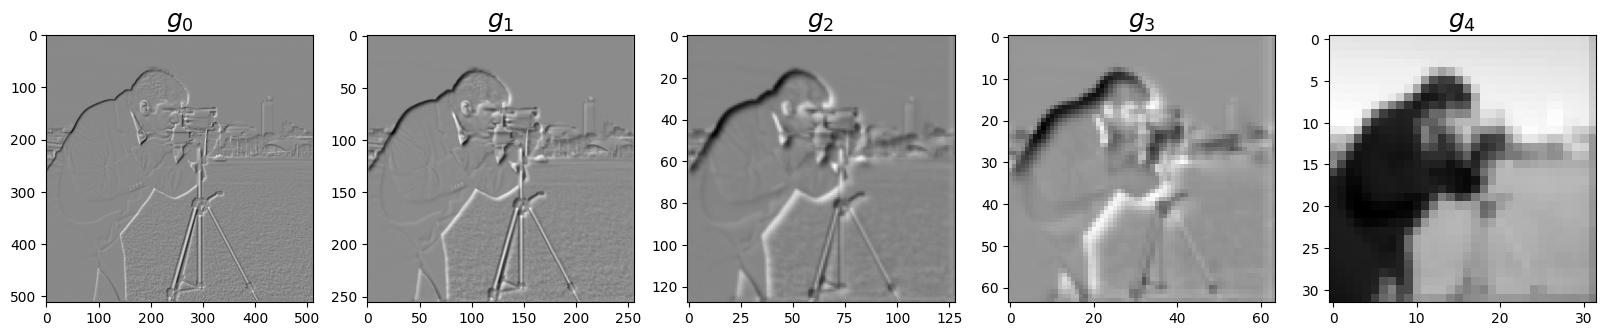

In [194]:
lpyr = LPyramid(camera, 0.4, 5)

f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))
ax0.imshow(lpyr[0], cmap='gray')
ax0.set_title('$g_{0}$', fontsize=18)
ax1.imshow(lpyr[1], cmap='gray')
ax1.set_title('$g_{1}$', fontsize=18)
ax2.imshow(lpyr[2], cmap='gray')
ax2.set_title('$g_{2}$', fontsize=18)
ax3.imshow(lpyr[3], cmap='gray')
ax3.set_title('$g_{3}$', fontsize=18)
ax4.imshow(lpyr[4], cmap='gray')
ax4.set_title('$g_{4}$', fontsize=18)

Text(0.5, 1.0, '$g_{4}$')

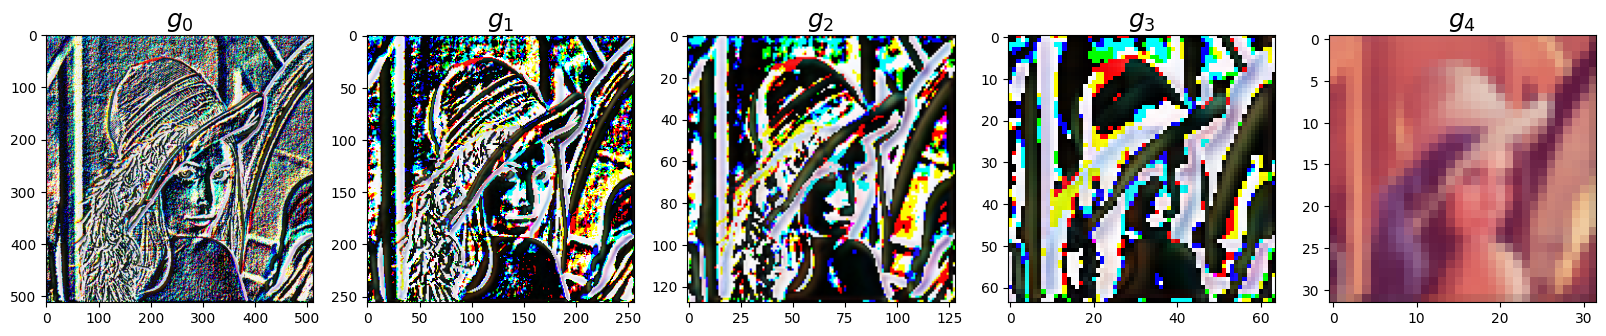

In [195]:
lpyr = LPyramid(lena, 0.4, 5)

f, (ax0,ax1,ax2,ax3,ax4) = plt.subplots(1, 5, figsize=(20, 10))
ax0.imshow(lpyr[0].astype('uint8'))
ax0.set_title('$g_{0}$', fontsize=18)
ax1.imshow(lpyr[1].astype('uint8'))
ax1.set_title('$g_{1}$', fontsize=18)
ax2.imshow(lpyr[2].astype('uint8'))
ax2.set_title('$g_{2}$', fontsize=18)
ax3.imshow(lpyr[3].astype('uint8'))
ax3.set_title('$g_{3}$', fontsize=18)
ax4.imshow(lpyr[4].astype('uint8'))
ax4.set_title('$g_{4}$', fontsize=18)

Text(0.5, 1.0, 'Camera Decoded')

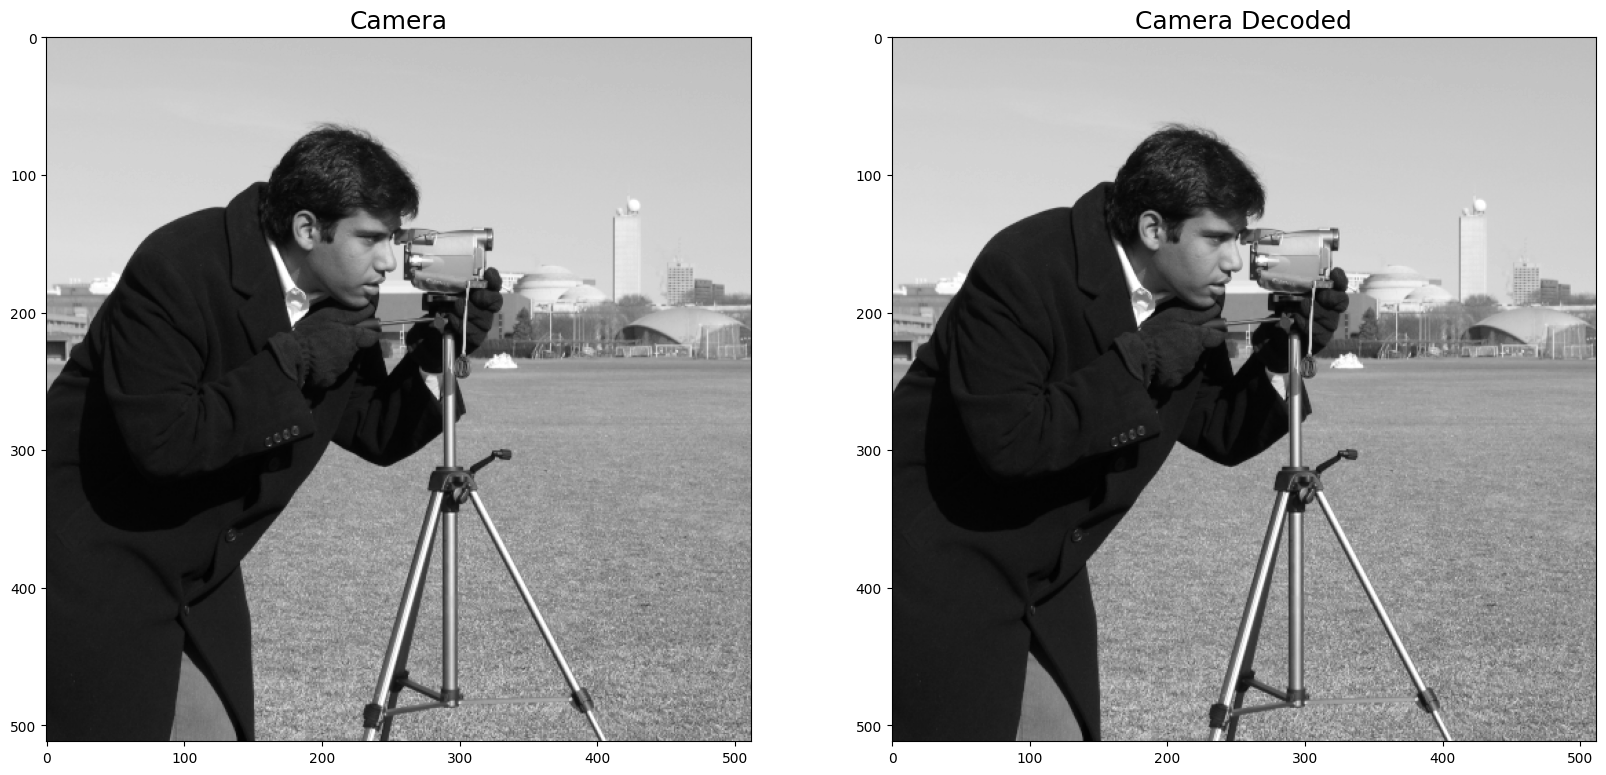

In [196]:
f, (ax0,ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(camera, cmap='gray')
ax0.set_title('Camera', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,10),0.4), cmap='gray')
ax1.set_title('Camera Decoded', fontsize=18)

Text(0.5, 1.0, 'Lena Decoded')

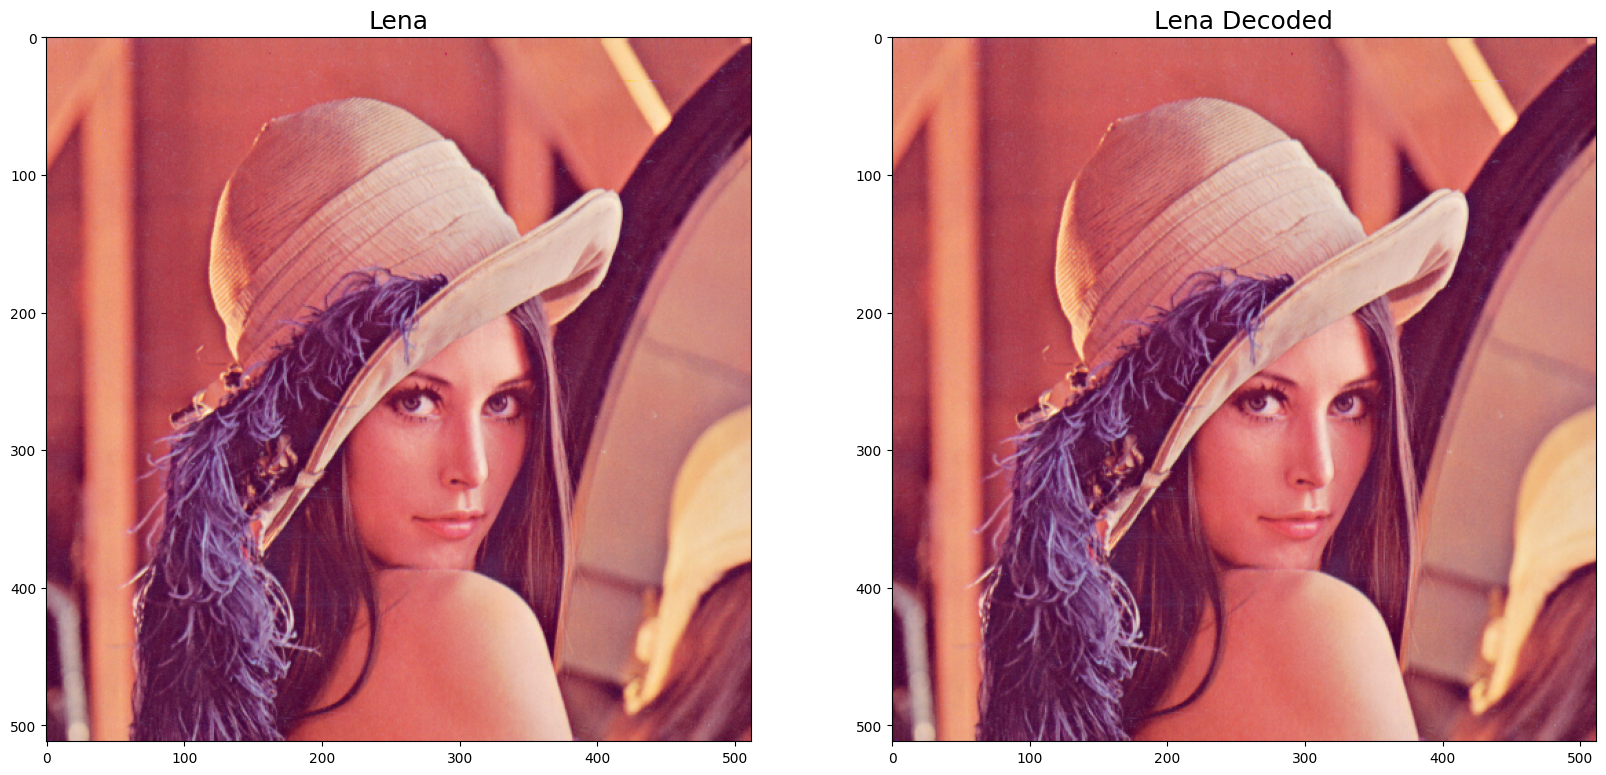

In [197]:
f, (ax0,ax1) = plt.subplots(1, 2, figsize=(20, 10))
ax0.imshow(lena.astype('uint8'))
ax0.set_title('Lena', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,10),0.4).astype('uint8'))
ax1.set_title('Lena Decoded', fontsize=18)

###β) Δοκιμή διαφορετικών τιμών του a στο διάστημα  [0.3,..,0.7].

Σε όλες τις περιπτώσεις αποκωδικοποιούμε Laplacian πυραμίδα με βάθος 6 επίπεδα.

Text(0.5, 1.0, 'Camera Decoded (a=0.7)')

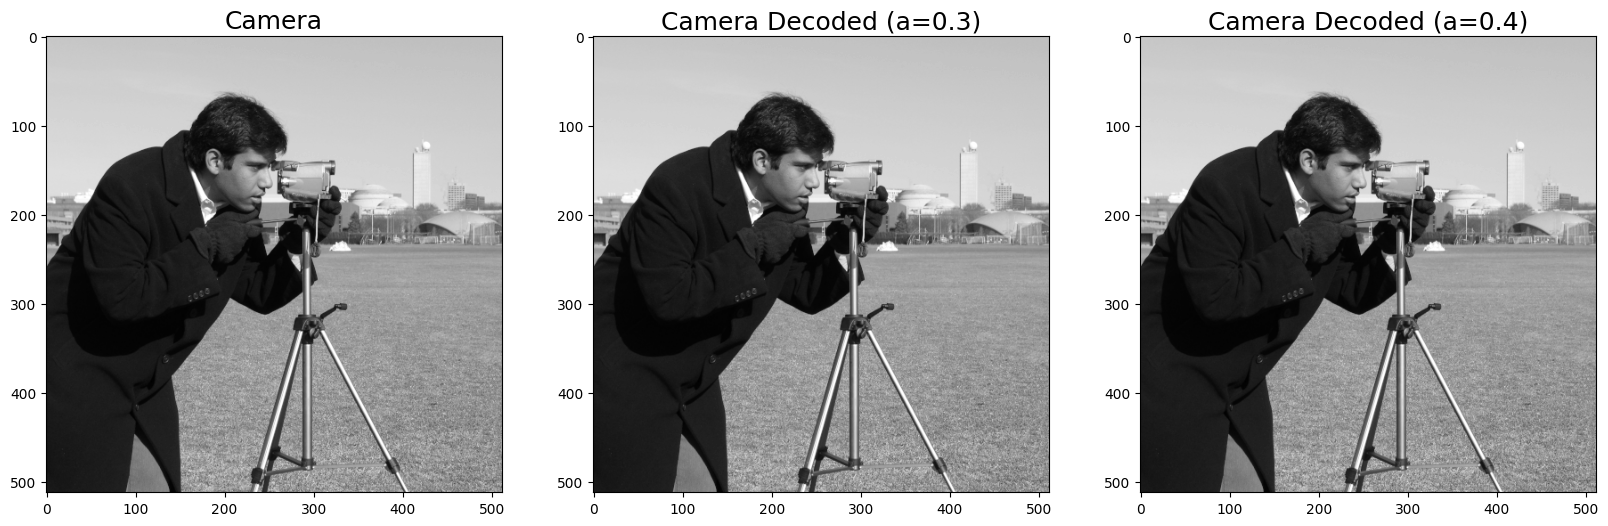

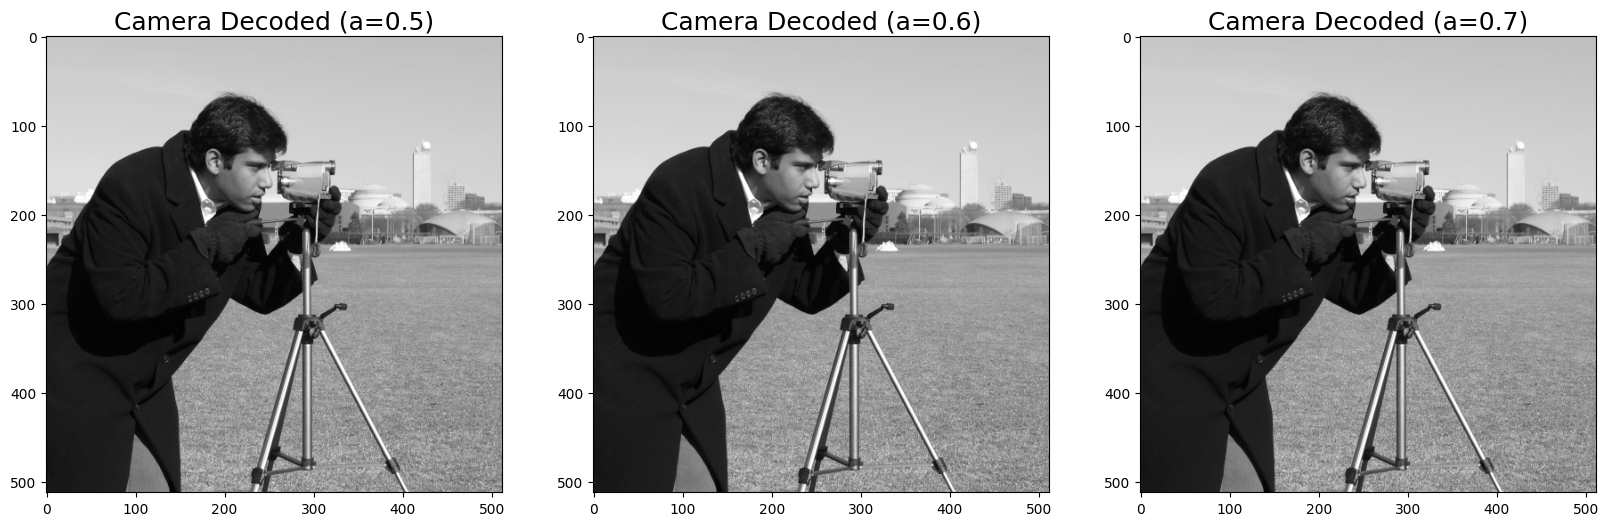

In [198]:
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(camera, cmap='gray')
ax0.set_title('Camera', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(camera,0.3,6),0.3), cmap='gray')
ax1.set_title('Camera Decoded (a=0.3)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,6),0.4), cmap='gray')
ax2.set_title('Camera Decoded (a=0.4)', fontsize=18)
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(L_Pyramid_Decode(LPyramid(camera,0.5,6),0.5), cmap='gray')
ax0.set_title('Camera Decoded (a=0.5)', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(camera,0.6,6),0.6), cmap='gray')
ax1.set_title('Camera Decoded (a=0.6)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(camera,0.7,6),0.7), cmap='gray')
ax2.set_title('Camera Decoded (a=0.7)', fontsize=18)

Text(0.5, 1.0, 'Lena Decoded (a=0.7)')

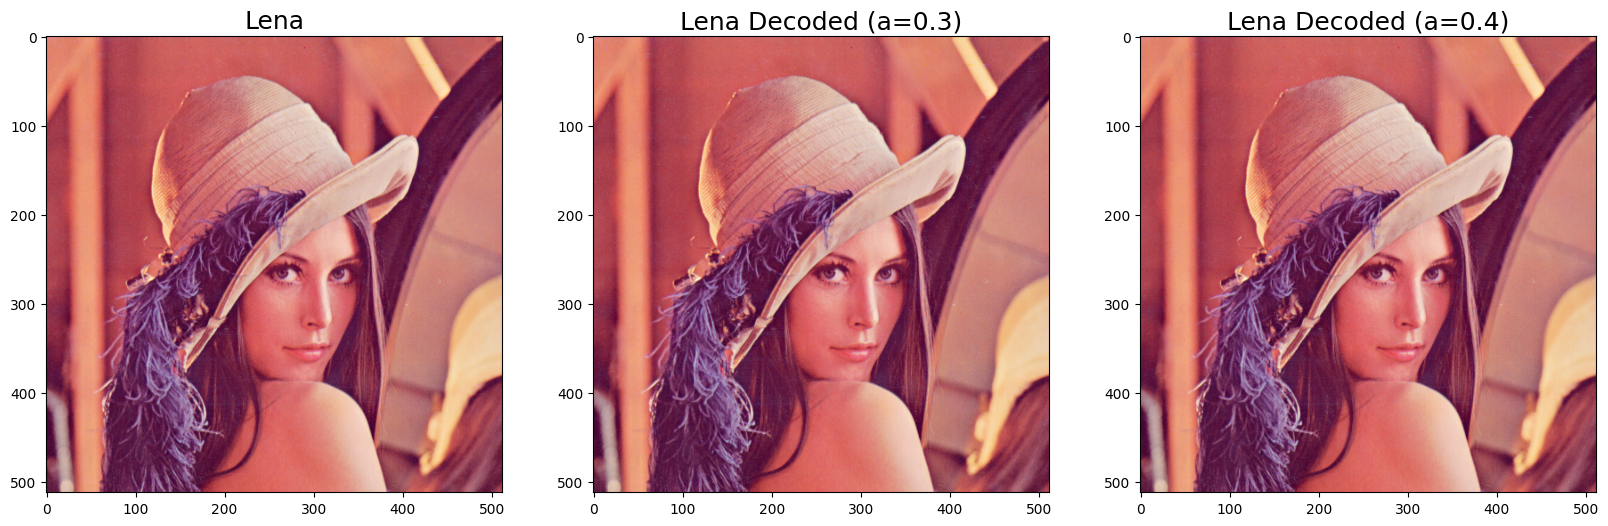

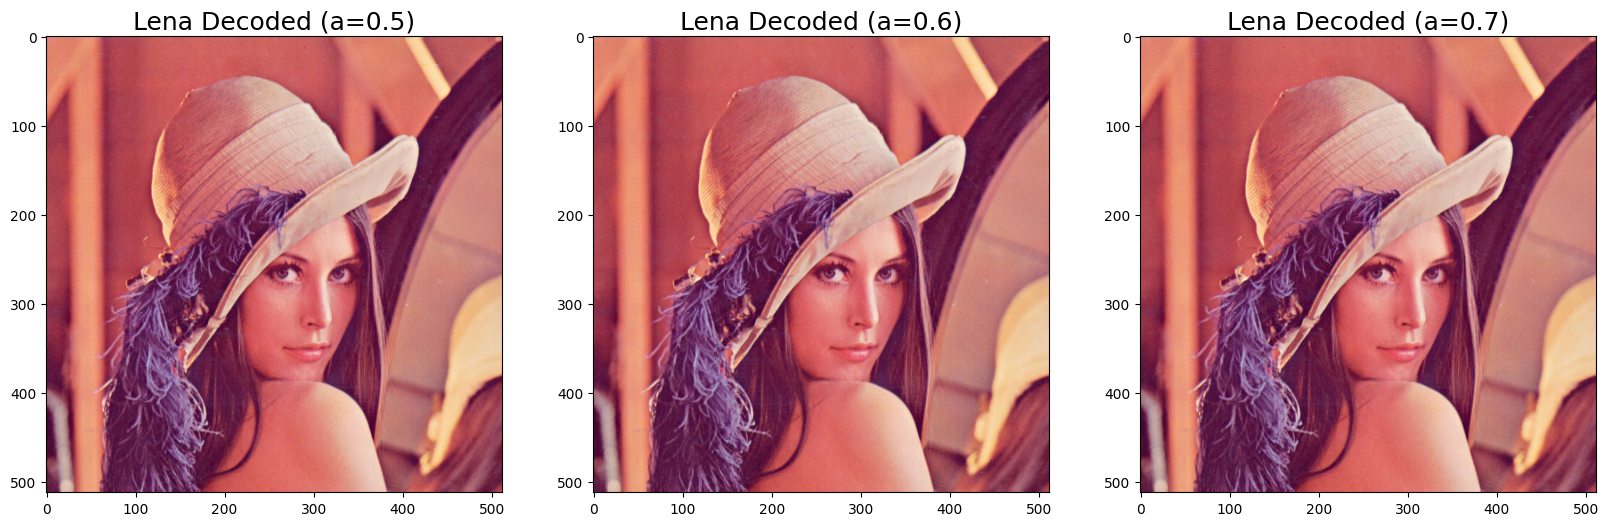

In [199]:
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(lena.astype('uint8'))
ax0.set_title('Lena', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(lena,0.3,6),0.3).astype('uint8'))
ax1.set_title('Lena Decoded (a=0.3)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,6),0.4).astype('uint8'))
ax2.set_title('Lena Decoded (a=0.4)', fontsize=18)
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(L_Pyramid_Decode(LPyramid(lena,0.5,6),0.5).astype('uint8'))
ax0.set_title('Lena Decoded (a=0.5)', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(lena,0.6,6),0.6).astype('uint8'))
ax1.set_title('Lena Decoded (a=0.6)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(lena,0.7,6),0.7).astype('uint8'))
ax2.set_title('Lena Decoded (a=0.7)', fontsize=18)

###γ) Δοκιμή διαφορετικών τιμών βάθους (depth) της Laplacian πυραμίδας στο διάστημα  [0.3,..,0.7].

Σε όλες τις περιπτώσεις αποκωδικοποιούμε Laplacian πυραμίδα που δημιουργήθηκε με a = 0.4.

(-0.5, 499.5, 499.5, -0.5)

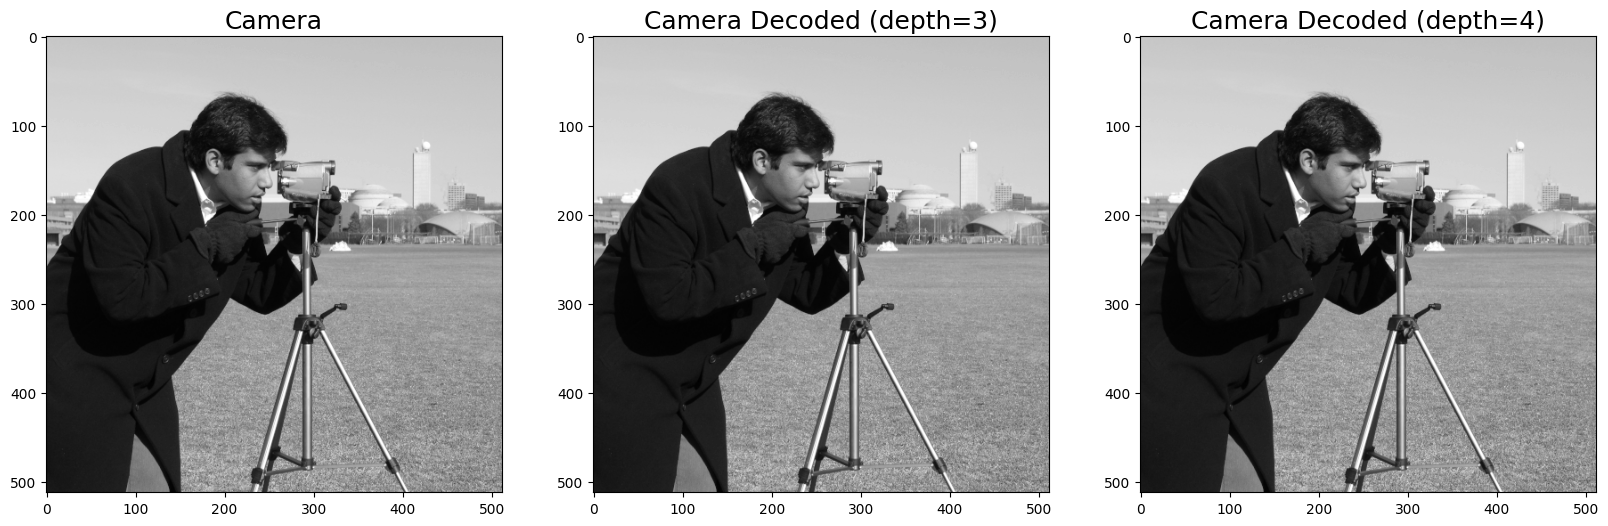

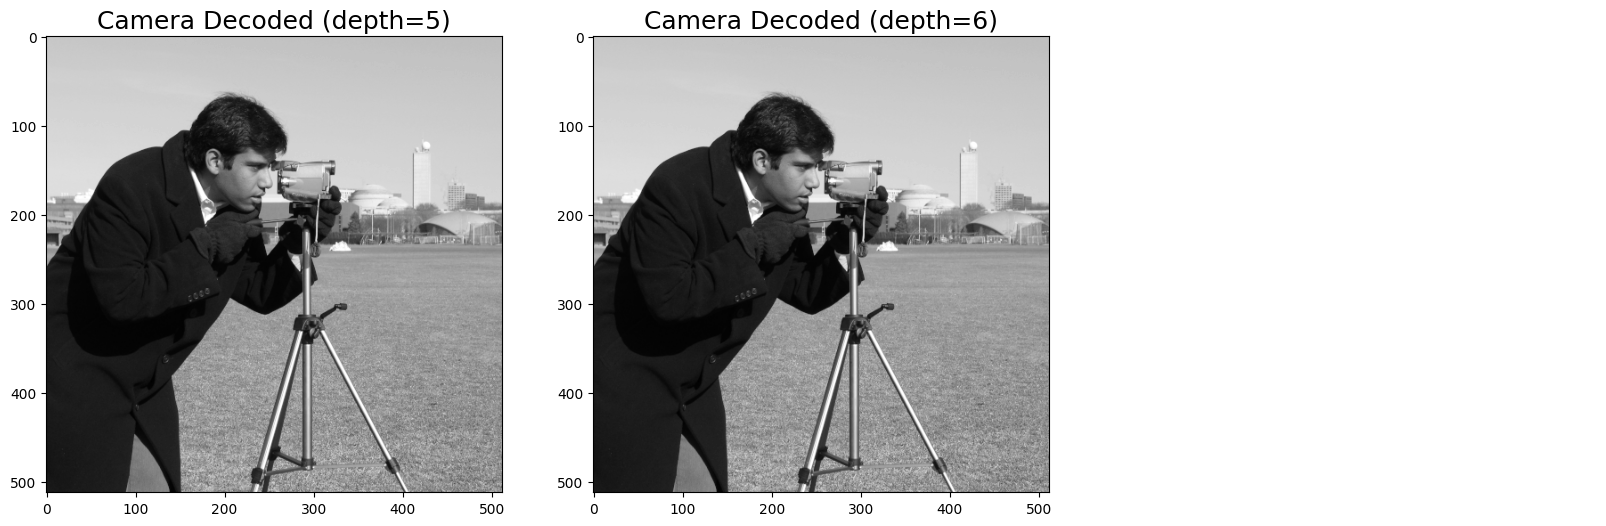

In [200]:
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(camera, cmap='gray')
ax0.set_title('Camera', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,3),0.4), cmap='gray')
ax1.set_title('Camera Decoded (depth=3)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,4),0.4), cmap='gray')
ax2.set_title('Camera Decoded (depth=4)', fontsize=18)
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,5),0.4), cmap='gray')
ax0.set_title('Camera Decoded (depth=5)', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(camera,0.4,6),0.4), cmap='gray')
ax1.set_title('Camera Decoded (depth=6)', fontsize=18)
ax2.imshow(255*np.ones((500, 500, 3), dtype = np.uint8))
ax2.set_title('', fontsize=18)
ax2.axis('off')

(-0.5, 499.5, 499.5, -0.5)

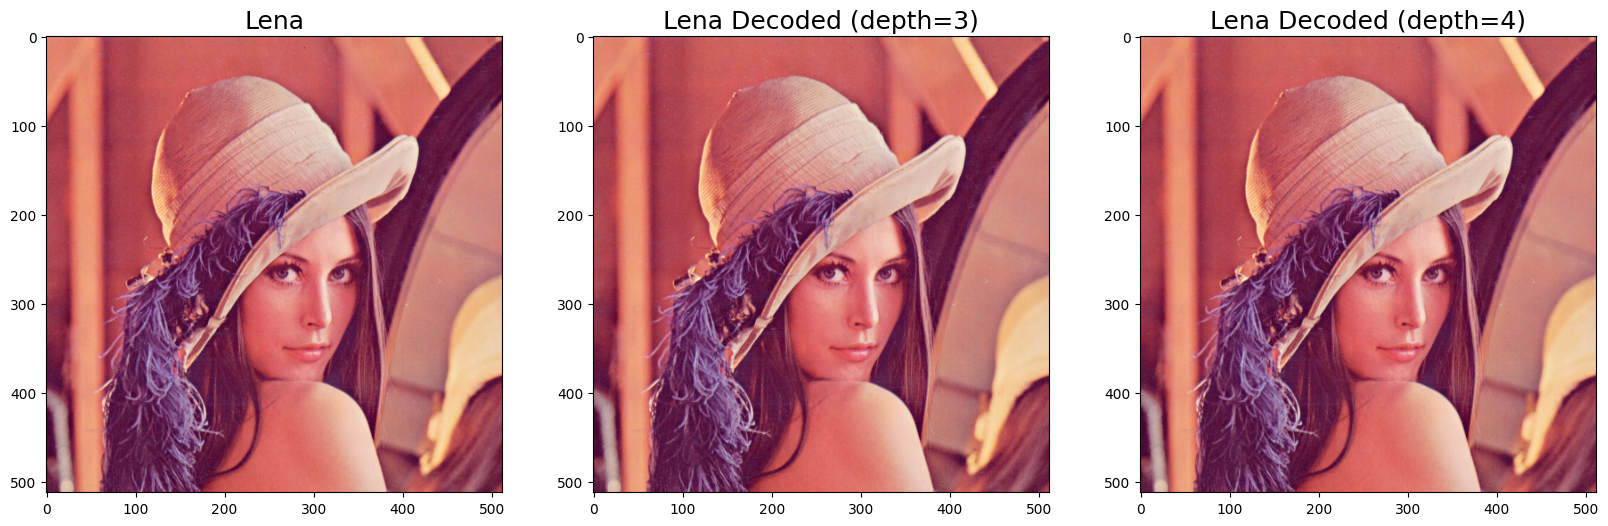

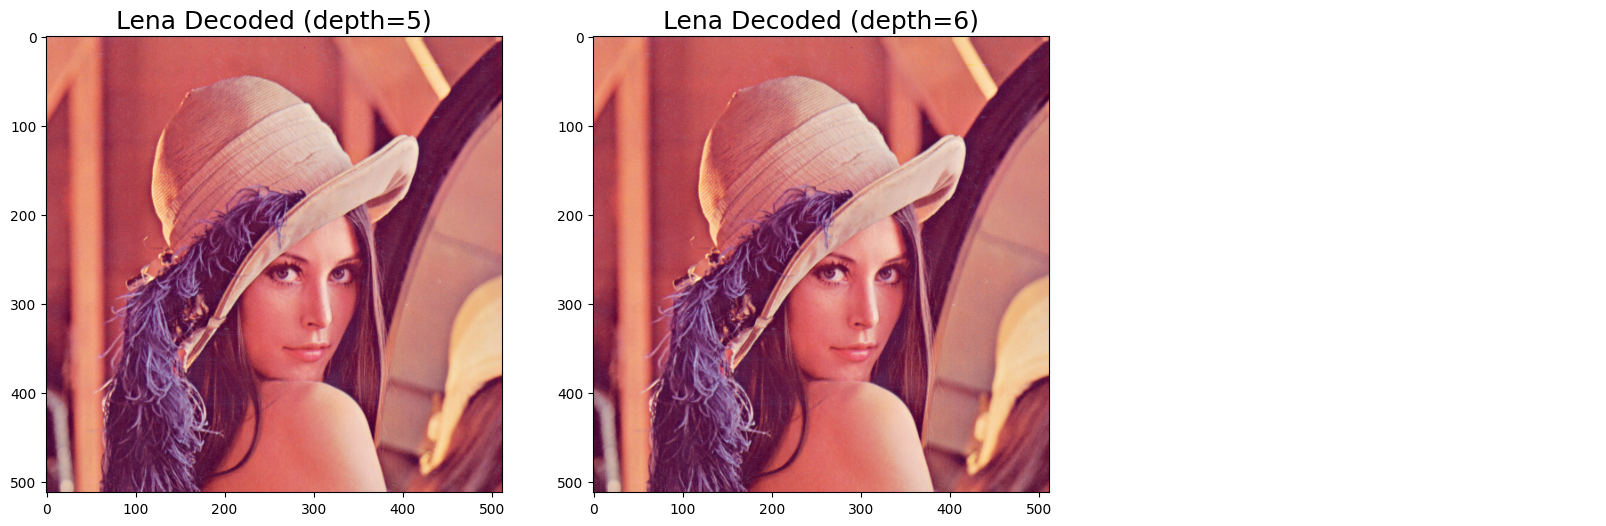

In [201]:
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(lena.astype('uint8'))
ax0.set_title('Lena', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,3),0.4).astype('uint8'))
ax1.set_title('Lena Decoded (depth=3)', fontsize=18)
ax2.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,4),0.4).astype('uint8'))
ax2.set_title('Lena Decoded (depth=4)', fontsize=18)
f, (ax0,ax1,ax2) = plt.subplots(1, 3, figsize=(20, 10))
ax0.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,5),0.4).astype('uint8'))
ax0.set_title('Lena Decoded (depth=5)', fontsize=18)
ax1.imshow(L_Pyramid_Decode(LPyramid(lena,0.4,6),0.4).astype('uint8'))
ax1.set_title('Lena Decoded (depth=6)', fontsize=18)
ax2.imshow(255*np.ones((500, 500, 3), dtype = np.uint8))
ax2.set_title('', fontsize=18)
ax2.axis('off')

###δ) Υπολογισμός εντροπίας.

###ε) Υπολογισμός βέλτιστου a.

###στ) Κβαντισμός των εικόνων για το βέλτιστο a.